<a href="https://colab.research.google.com/github/willamesalmeida/machine_learning/blob/master/Machine_learning_na_pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O DATASET analisado é sobre qualidade de vinho e pode ser encontrado no seguinte sitio:**

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 

In [1194]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#1 Fazendo os importes da biblioteca

In [1251]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.tree import plot_tree
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import f1_score
  from sklearn.metrics  import roc_auc_score
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  from sklearn.ensemble import RandomForestClassifier

# 2 fazendo a leitura e o carregamento dos dados na memória



In [1196]:
#lendo o dataset video_games_sales 
dados = pd.read_csv('/content/drive//My Drive/Colab Notebooks/Dataset/winequality-red.csv')

In [1197]:
#verificando as colunas do arquivo
dados.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [1198]:
#visualizando algumas linhas 
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3 Tratando os dados e fazendo limpeza

In [1199]:
#verificando a quantidade de linhas e colunas
dados.shape

(1599, 12)

In [1200]:
#removendo valores duplicados e visualizando se teve muita diferença utilizando shape (possuia alguns valores duplicados) 
dados = dados.drop_duplicates()
dados.shape

(1359, 12)

In [1201]:
#Removendo os valores NAN (não possuia NAN)
dados = dados.dropna()
dados.shape

(1359, 12)

In [1202]:
#verificando a quantidade de valores nulos dentro do dataframe
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1203]:
#renomeando as colunas para failcitar a analise posteriormente
dados = dados.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide','citric acid':'citric_acid' })
#Visualizando a tabela com a nova nomeclatura
dados.head(35)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


#4 Análise preliminar dos dados

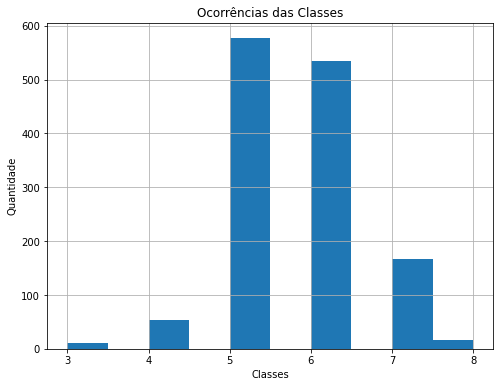

In [1204]:
#verificando as pontuações da qualidade 
plt.hist(dados['quality'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [1205]:
#Visualizando a quantidade de vinhos pelas pontuações de qualidade
print('Qualidade 1: ', dados[dados['quality']==1].shape[0])
print('Qualidade 2: ', dados[dados['quality']==2].shape[0])
print('Qualidade 3: ', dados[dados['quality']==3].shape[0])
print('Qualidade 4: ', dados[dados['quality']==4].shape[0])
print('Qualidade 5: ', dados[dados['quality']==5].shape[0])
print('Qualidade 6: ', dados[dados['quality']==6].shape[0])
print('Qualidade 7: ', dados[dados['quality']==7].shape[0])
print('Qualidade 8: ', dados[dados['quality']==8].shape[0])
print('Qualidade 9: ', dados[dados['quality']==9].shape[0])
print('Qualidade 10: ', dados[dados['quality']==10].shape[0])

Qualidade 1:  0
Qualidade 2:  0
Qualidade 3:  10
Qualidade 4:  53
Qualidade 5:  577
Qualidade 6:  535
Qualidade 7:  167
Qualidade 8:  17
Qualidade 9:  0
Qualidade 10:  0


Verificando a distribuição de alguns atributos que podem ser importantes para a classificação do vinho

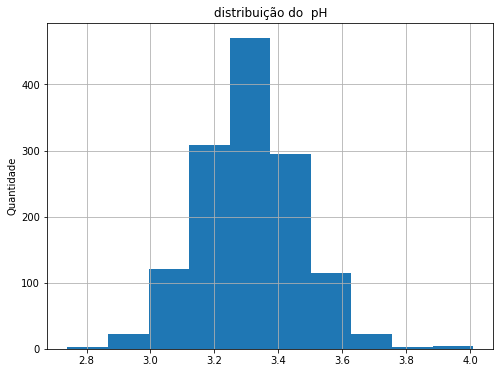

In [1206]:
#verificando a distribuição do atibuto pH 
plt.hist(dados['pH'],10)
plt.ylabel('Quantidade')
plt.title('distribuição do  pH')
plt.grid(True)
plt.show()

O PH dos vinhos não passam de 4.0 e a maior ocorrência é de vinhos com PH entre 3.2 e 3.4

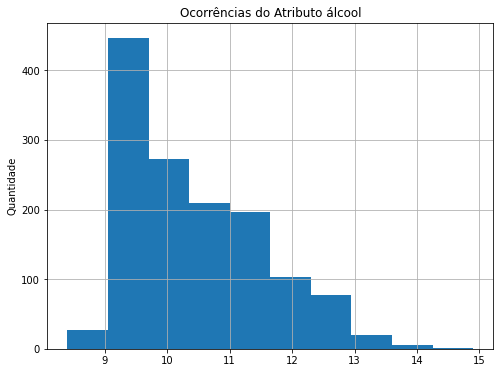

In [1207]:
#verificando a distribuição do atibuto álcool
plt.hist(dados['alcohol'], 10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo álcool')
plt.grid(True)
plt.show()

O Teor alcoólico dos vinhos não passam de 15 sendo que a maior ocorrencia de teor alcoólico está entre 9 e 10

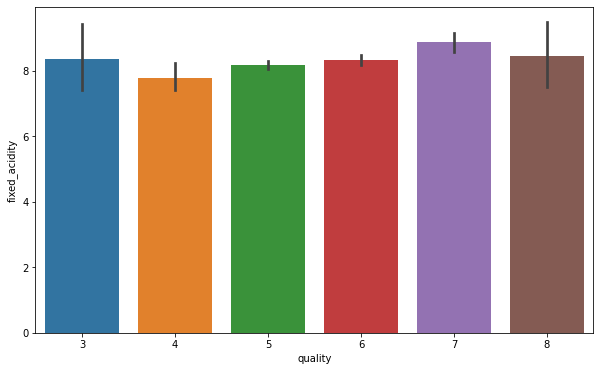

In [1208]:
#Verificando a influencia de alguns atributos para a qualidade do vinho 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'fixed_acidity', data = dados)

Nesse caso vemos que a ácidez fixa não influência muito na qualidade do vinho porque entre as pontuações de qualidade 

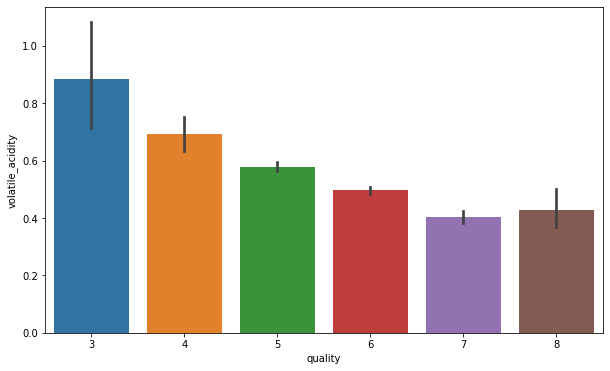

In [1209]:
#Verificando a influencia da acidez volatil na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'volatile_acidity', data = dados)

Vemos que com o aumento da qualidade acontece uma diminuição da acidez volátil

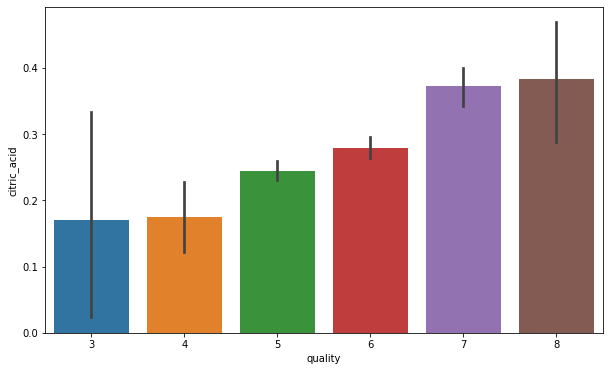

In [1210]:
#Verificando a influencia do acido citrico na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'citric_acid', data = dados)

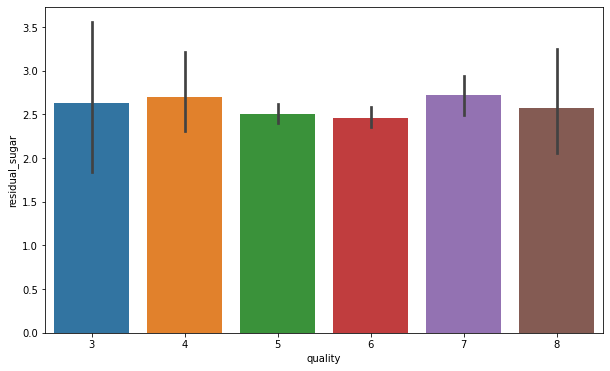

In [1211]:
#Verificando a influencia do açuxar residual na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'residual_sugar', data = dados)

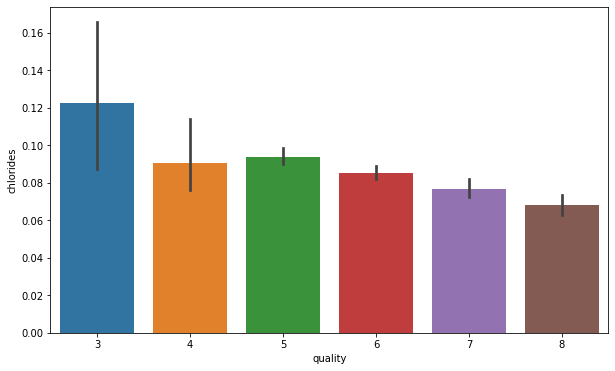

In [1212]:
#Verificando a influencia do cloreto na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'chlorides', data = dados)

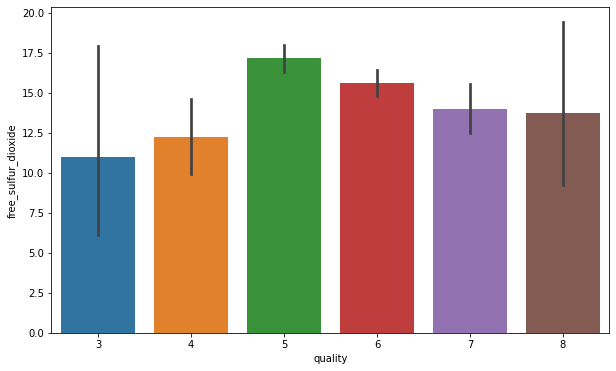

In [1213]:
#Verificando a influencia do dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'free_sulfur_dioxide', data = dados)

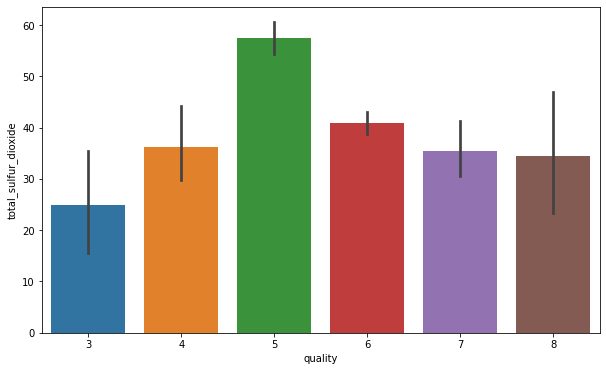

In [1214]:
#Verificando a influencia do total de dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'total_sulfur_dioxide', data = dados)

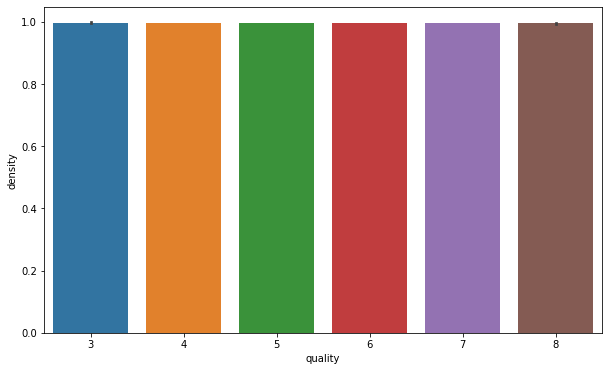

In [1215]:
#Verificando a influencia do density na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'density', data = dados)

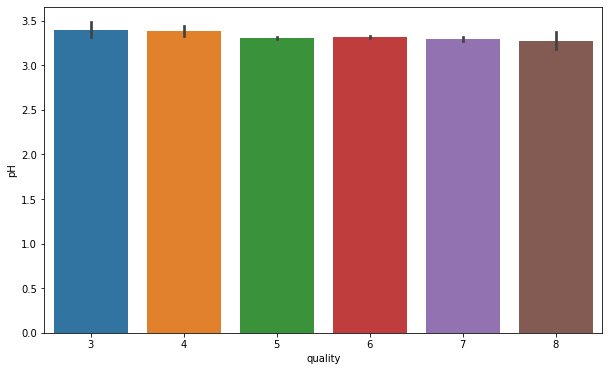

In [1216]:
#Verificando a influencia do pH na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'pH', data = dados)

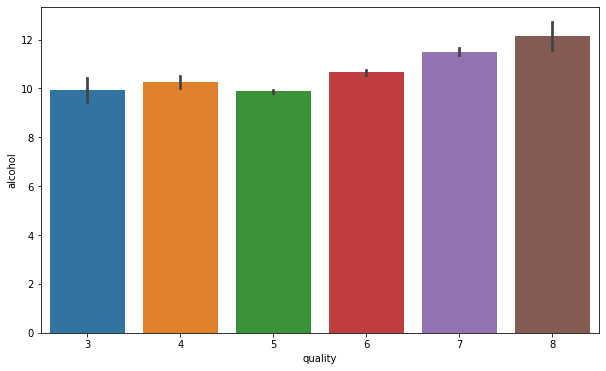

In [1217]:
#Verificando a influencia do álcool na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'alcohol', data = dados)

**Boxpot**

verificando os pontos fora da curva

mediana quartis

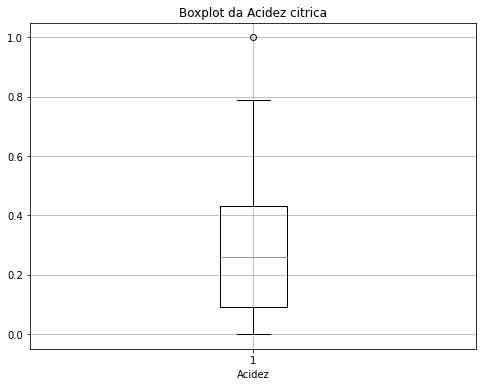

In [1218]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot(dados.citric_acid)
plt.title('Boxplot da Acidez citrica')
plt.xlabel('Acidez')
plt.grid()
plt.show()

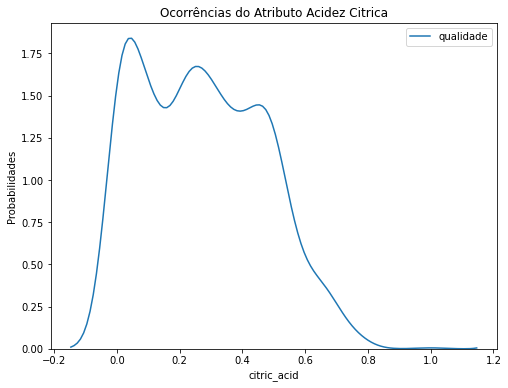

In [1219]:

sns.distplot(dados.citric_acid, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Acidez Citrica')
plt.show()

In [1220]:
#verificando a correlação dos dados
corr = dados.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


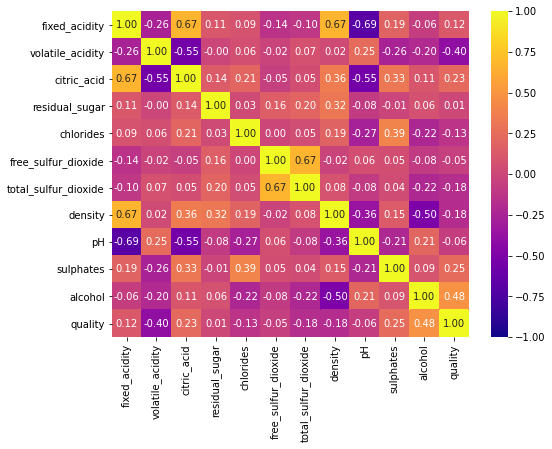

In [1221]:
#Não possui muita correlação 
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=plt.cm.plasma)
#sns.diverging_palette(20, 220, n=200)


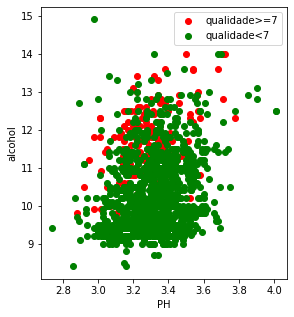

In [1222]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=dados.pH[dados.quality>=7],y=dados.alcohol[dados.quality>=7],c='red')
plt.scatter(x=dados.pH[dados.quality<7],y=dados.alcohol[dados.quality<7],c='green')
plt.xlabel('PH')
plt.ylabel('alcohol')
plt.legend(['qualidade>=7','qualidade<7'])

In [1223]:
#Fazendo classificação binária para a variável de resposta.
#Dividindo o vinho em bom e ruim, dando o limite para a qualidade
#bins = (2, 6.5, 8)
#group_names = ['bad', 'good']
#dados['quality'] = pd.cut(dados['quality'], bins = bins, labels = group_names)

In [1224]:
#Agora vamos atribuir rótulos à nossa variável de qualidade
#label_quality = LabelEncoder()
#dados['quality'] = label_quality.fit_transform(dados['quality'])
#dados['quality'].value_counts()
#sns.countplot(dados['quality'])

In [1225]:
#Now seperate the dataset as response variable and feature variabes
#X = dados.drop('quality', axis = 1)
#y = dados['quality']
#Treinar e testar a divisão de dados
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Aplicando escala padrão para obter resultados otimizados
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)


**Classificação**

*   Testando com Arvores(s) de decisão



#5 Classificação



In [1226]:
#Dividindo meus dados em atibutos descritores e atributos de classe 
X = dados.iloc[:,:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


**Re-escala dos dados com maximo e mínimo**

In [1227]:
X = (X - X.min())/(X.max() - X.min())

**Peguei todas as colunas, exceto a quality, porque essa seria a coluna de classificação dos vinho, com as respectivas pontuações dos vinhos**

In [1228]:
y = dados.quality
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

**Divdindo em dados de teste e dados de treino**

In [1229]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

#6 definindo o algoritmo de aprendizado



**Os importes das bibliotecas estão sendo feitas todas em um unico lugar no top desse notebook (gosto das coisas organizadas)**

Utilizando a Árvore de decisão

In [1230]:
#definindo modelo 
classificador = DecisionTreeClassifier()

In [1231]:
 #treiando o modelo
 classificador.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Plotando a arvore que foi criada

In [1232]:
plt.rcParams["figure.figsize"] = (30, 15)

In [1233]:
#verificando se esta fazendo um slice das colunas corretas 
print(dados.columns[:-1])

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


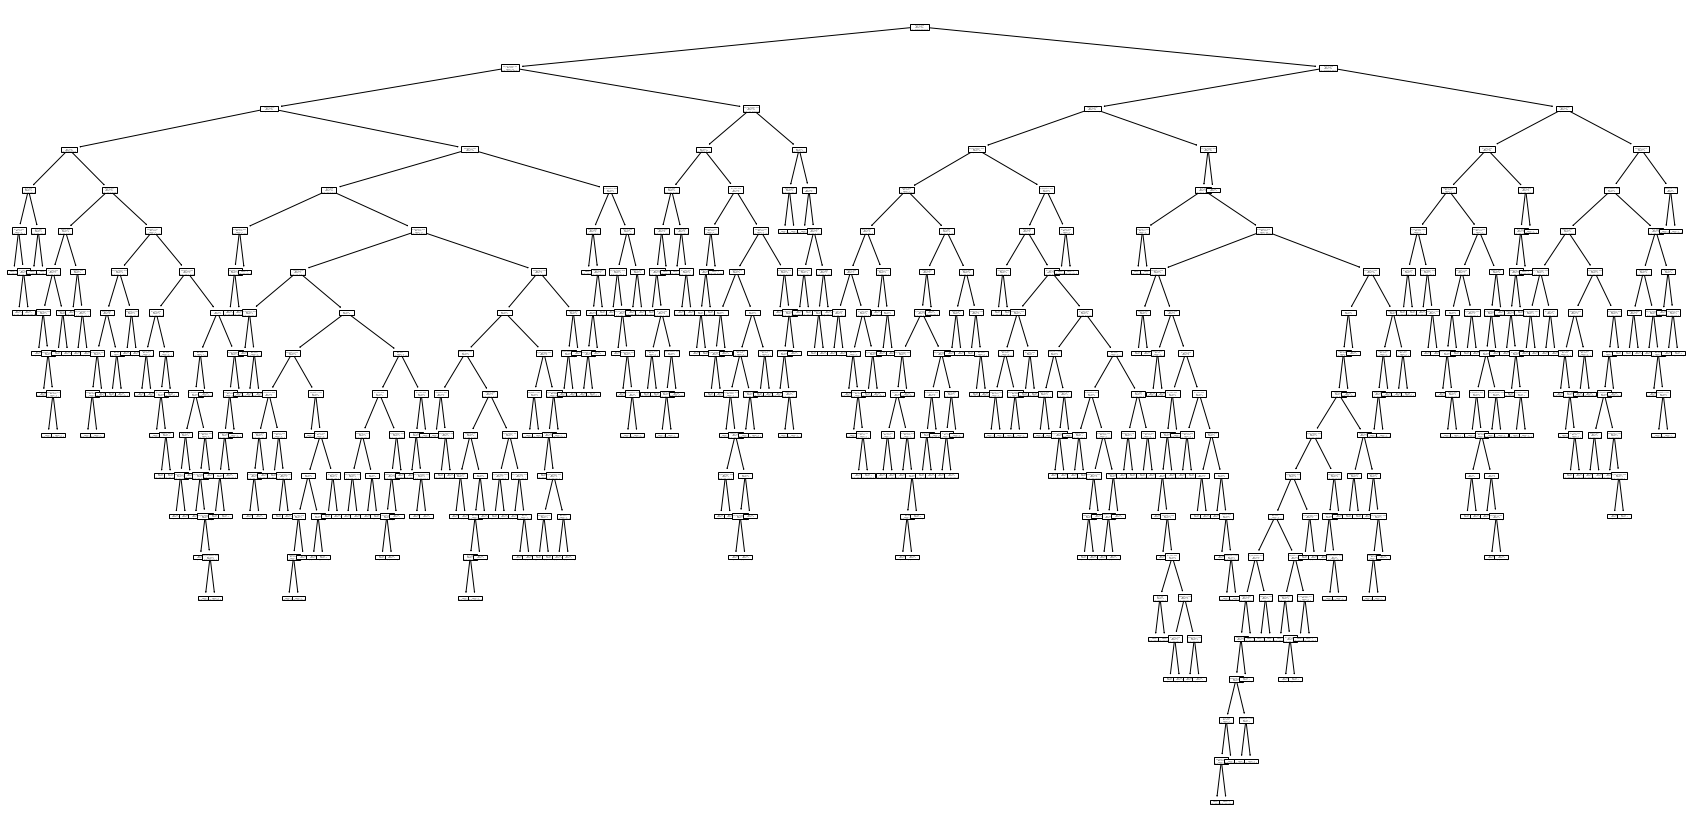

In [1234]:
plot_tree(classificador, feature_names=dados.columns[:-1])
plt.show()

In [1235]:
#Retornando o tamnaho da figura 
plt.rcParams["figure.figsize"] = (8, 6)

In [1236]:
#Realizando a classificação 
classificacao = classificador.predict(X_test)
classificacao

array([5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 4, 5, 6, 5, 6, 6, 6, 6, 6, 7,
       6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 7, 4, 5, 5, 5, 6, 6, 4, 5, 5,
       6, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5,
       6, 4, 6, 7, 5, 6, 6, 4, 6, 6, 4, 5, 5, 6, 5, 7, 5, 7, 6, 5, 4, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 8, 5, 5, 5, 6,
       4, 5, 7, 6, 7, 6, 6, 5, 5, 7, 6, 6, 4, 5, 6, 5, 7, 6, 6, 5, 5, 6,
       5, 5, 6, 5, 6, 6, 5, 5, 4, 6, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 6,
       5, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 7, 6, 5, 6, 6,
       5, 6, 5, 7, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 7, 7, 5, 5, 5, 6, 6, 4,
       6, 6, 4, 5, 6, 6, 7, 5, 6, 6, 6, 7, 6, 7, 7, 6, 6, 4, 6, 5, 4, 6,
       7, 3, 6, 5, 6, 5, 5, 4, 7, 5, 7, 6, 4, 6, 5, 6, 5, 6, 5, 6, 4, 5,
       6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 8, 6, 5, 5, 5, 4, 4, 7, 5, 5, 5, 5,
       6, 6, 5, 6, 5, 4, 6, 6])

In [1237]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t', classificacao[i])

5 	 5
5 	 6
5 	 7
7 	 5
5 	 5
7 	 6
7 	 6
5 	 5
5 	 5
5 	 5
5 	 5
5 	 5
6 	 4
6 	 5
6 	 6
6 	 5
6 	 6
5 	 6
6 	 6
6 	 6
5 	 6
7 	 7
5 	 6
6 	 7
5 	 6
5 	 5
5 	 5
4 	 5
5 	 5
6 	 6
5 	 5
7 	 6
7 	 7
3 	 5
5 	 7
5 	 4
5 	 5
5 	 5
5 	 5
6 	 6
6 	 6
5 	 4
5 	 5
5 	 5
6 	 6
5 	 5
5 	 5
7 	 7
5 	 5
5 	 5
6 	 5
6 	 6
5 	 5
6 	 6
5 	 5
7 	 7
5 	 6
6 	 6
4 	 6
6 	 6
6 	 5
6 	 7
7 	 5
6 	 5
5 	 5
6 	 5
6 	 6
5 	 4
6 	 6
6 	 7
5 	 5
5 	 6
4 	 6
5 	 4
6 	 6
4 	 6
7 	 4
5 	 5
6 	 5
5 	 6
6 	 5
7 	 7
5 	 5
5 	 7
6 	 6
5 	 5
5 	 4
6 	 5
7 	 6
6 	 6
7 	 6
6 	 6
6 	 6
6 	 6
5 	 5
6 	 6
6 	 6
6 	 5
6 	 5
6 	 5
6 	 5
5 	 6
4 	 5
5 	 6
6 	 5
6 	 8
5 	 5
6 	 5
6 	 5
5 	 6
6 	 4
6 	 5
6 	 7
7 	 6
8 	 7
5 	 6
6 	 6
5 	 5
6 	 5
6 	 7
5 	 6
6 	 6
5 	 4
4 	 5
6 	 6
5 	 5
8 	 7
6 	 6
7 	 6
4 	 5
6 	 5
5 	 6
5 	 5
6 	 5
6 	 6
5 	 5
4 	 6
7 	 6
5 	 5
5 	 5
5 	 4
6 	 6
5 	 5
6 	 5
4 	 5
5 	 5
6 	 4
5 	 5
5 	 5
5 	 5
5 	 5
6 	 5
6 	 4
5 	 6
6 	 5
7 	 7
5 	 5
6 	 5
6 	 5
6 	 5
5 	 6
7 	 6
8 	 6
7 	 6
5 	 6
5 	 5
5 	 

# 7 Avaliação do classificador

**Agora vamos avaliar a taxa de acerto do nosso classificador**

In [1238]:
#Verificando a curaria (Taxa de acertos do classificador)
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.47058823529411764

In [1239]:
#Verificando o Recall (taxa de instancias classificadas corretamente)
recall = recall_score(y_test,classificacao, average='weighted')
recall

0.47058823529411764

In [1240]:
#Verificando a precisão (taxa de instâncias classificadas como positivas que realmente são positivas 
precisao = precision_score(y_test,classificacao,average='weighted')
precisao

0.49086296510188937

In [1241]:
#Verificando o F1(Balanço entre precisão e recall)
f1 = f1_score(y_test,classificacao, average='weighted')
f1

0.4803876513840831

# **Área sob a Curva - AUC**


Plotando a curva ROC (não consegui plotar a curva ROC. Pelo que vi na documentação a função "fpr, tpr, _ = roc_curve(y_test,classificacao)" funciona especificamente para classificação binária, já meu dataset é multiclass

In [1242]:
#pegando as estimativas de probabilidade do meu modelo de arvore para passar no AUC área sob a curva
y_predic_prob = classificador.predict_proba(X_test)
y_predic_prob

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [1243]:
#valor da área sobr a curva 
roc_auc_score(y_test, y_predic_prob, multi_class='ovo')

0.5347383518839688

# **Validação Cruzada**

In [1244]:
#Montando os folds para a validação cruzada
kf = KFold(n_splits=5)

In [1245]:
crossclassificador = DecisionTreeClassifier()

In [1247]:
scores = cross_val_score(crossclassificador, X,y,cv = 10)
scores

array([0.41176471, 0.45588235, 0.47794118, 0.44117647, 0.42647059,
       0.51470588, 0.5       , 0.49264706, 0.375     , 0.46666667])

Mesmo com essas divisões dos folds a minha taxa de acerto ainda continuou baixa em todos os folds

In [1250]:
scores.mean(),scores.std()

(0.45622549019607844, 0.041145559125566375)

#**8 Comparando a Árvore de Decisão com a Random Forest**


In [1253]:
#criando meu novo modelo de arvore 
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1255]:
#Criando minha random florest 
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1257]:
#calculando acurácia da árvores de decisão
arvore.score(X_test, y_test)

0.4852941176470588

In [1259]:
#calculando a acuracia da random florest
floresta.score(X_train, y_train)

1.0

In [1262]:
#realizando previsão com arvore de decisão
clf_arvore = arvore.predict(X_test)

In [1264]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

#Validação Cruzada

In [1269]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.442, 0.033)

In [1270]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.567, 0.038)